In [56]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
tf.__version__

'2.14.0'

# Classification

In [59]:
fmnist_data = keras.datasets.fashion_mnist

In [60]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
x_test.shape

(10000, 28, 28)

In [63]:
y_train.shape

(60000,)

In [64]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

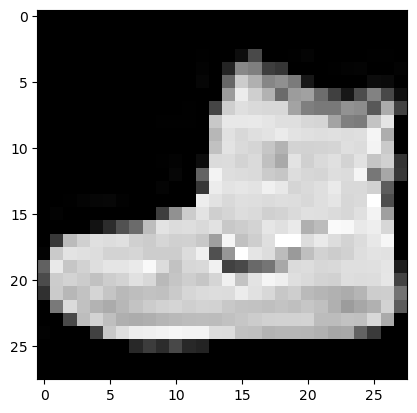

In [65]:
plt.imshow(x_train[0,], cmap="gray")

In [66]:
x_train, x_test = x_train/255.0, x_test/255.0

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Define Model 

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 75)                7575      
                                                                 
 dense_23 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.layers

In [72]:
weights, bias = model.layers[1].get_weights()

In [73]:
weights

array([[ 0.01791196,  0.02081484,  0.08163342, ..., -0.05444609,
        -0.05482383,  0.07080835],
       [-0.00612928, -0.02024156,  0.01084352, ..., -0.00413562,
         0.04541761,  0.08169907],
       [-0.07335846,  0.01054297,  0.04249068, ..., -0.00769141,
         0.01577237,  0.00530303],
       ...,
       [ 0.02875923, -0.04055744, -0.06659829, ..., -0.01151861,
         0.07493274,  0.0720215 ],
       [ 0.06941354,  0.07882823, -0.0331161 , ..., -0.00860357,
        -0.01453238,  0.00413698],
       [ 0.05518581,  0.06245217, -0.00285228, ..., -0.04971759,
         0.02670829, -0.01819094]], dtype=float32)

In [74]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [76]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.7969 - accuracy: 0.7365 - val_loss: 0.5593 - val_accuracy: 0.8036
Epoch 2/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.5093 - accuracy: 0.8240 - val_loss: 0.5070 - val_accuracy: 0.8158
Epoch 3/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4596 - accuracy: 0.8391 - val_loss: 0.4574 - val_accuracy: 0.8421
Epoch 4/50
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4320 - accuracy: 0.8488 - val_loss: 0.4413 - val_accuracy: 0.8450
Epoch 5/50
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4120 - accuracy: 0.8558 - val_loss: 0.4324 - val_accuracy: 0.8466
Epoch 6/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3956 - accuracy: 0.8621 - val_loss: 0.4188 - val_accuracy: 0.8547
Epoch 7/50
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3816 - accuracy: 0.8660 - val_loss: 0.3906 - val_accurac

In [77]:
print(history.history)

{'loss': [0.7969138622283936, 0.5092693567276001, 0.45963895320892334, 0.4319581389427185, 0.4119732677936554, 0.39559492468833923, 0.38158926367759705, 0.36999696493148804, 0.3597462773323059, 0.3512130379676819, 0.3427433371543884, 0.335600882768631, 0.32908162474632263, 0.3220192492008209, 0.31586968898773193, 0.3098200261592865, 0.3053467273712158, 0.29932424426078796, 0.2953249514102936, 0.28966039419174194, 0.28556105494499207, 0.28074416518211365, 0.27650365233421326, 0.2731718420982361, 0.2693406641483307, 0.2655715048313141, 0.26236775517463684, 0.2585931122303009, 0.2550574839115143, 0.2518901824951172, 0.24865691363811493, 0.24503923952579498, 0.24109244346618652, 0.2394506335258484, 0.23601120710372925, 0.23328185081481934, 0.2308204472064972, 0.2271752506494522, 0.22531282901763916, 0.222736194729805, 0.21912556886672974, 0.2173856794834137, 0.21523119509220123, 0.2126721292734146, 0.2104244828224182, 0.20702943205833435, 0.20385541021823883, 0.20270879566669464, 0.2010326

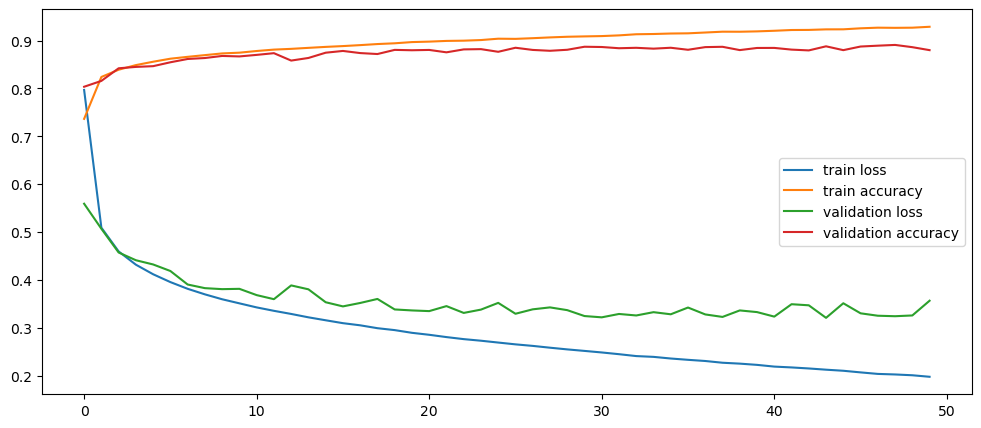

In [78]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [79]:
model.evaluate(x_test, y_test, verbose=0)

[0.366352379322052, 0.8715999722480774]

In [80]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

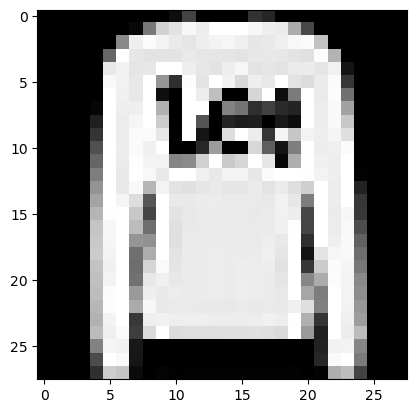

In [81]:
plt.imshow(x3[0], cmap="gray")

In [82]:
model.predict(x3).round(3)

1/1 [==============================] - 0s 470ms/step


array([[0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [83]:
model.predict(x3).shape

1/1 [==============================] - 0s 33ms/step


(2, 10)

In [84]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 [==============================] - 0s 34ms/step


array([2, 1], dtype=int64)

In [85]:
y_test[1:3]

array([2, 1], dtype=uint8)

# Regression

In [86]:
california_housing = fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [87]:
X_train0, X_test, y_train0, y_test = train_test_split(
                 california_housing["data"],
                 california_housing["target"])

In [88]:
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [89]:
X_test.shape

(5160, 8)

In [90]:
X_train0.shape

(15480, 8)

In [91]:
X_train1.shape

(11610, 8)

In [92]:
X_validation.shape

(3870, 8)

In [93]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [95]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [96]:
Rhistory=model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.9240 - mean_absolute_error: 0.6583 - val_loss: 0.5019 - val_mean_absolute_error: 0.5121
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4993 - mean_absolute_error: 0.5006 - val_loss: 0.4559 - val_mean_absolute_error: 0.4840
Epoch 3/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4454 - mean_absolute_error: 0.4777 - val_loss: 0.4323 - val_mean_absolute_error: 0.4681
Epoch 4/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4261 - mean_absolute_error: 0.4669 - val_loss: 0.4160 - val_mean_absolute_error: 0.4603
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4124 - mean_absolute_error: 0.4579 - val_loss: 0.4029 - val_mean_absolute_error: 0.4522
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4036 - mean_absolute_error: 0.4519 - val_loss: 0.4178 - val_mean_absolute_error: 0.4539
Epoch 7/30
363/3

In [97]:
Rhistory.history

{'loss': [0.9240228533744812,
  0.4993075430393219,
  0.4453747868537903,
  0.4260515570640564,
  0.4123574197292328,
  0.40362510085105896,
  0.3934149444103241,
  0.3921092450618744,
  0.377129465341568,
  0.36780115962028503,
  0.3581114411354065,
  0.3542470335960388,
  0.3490338623523712,
  0.34274181723594666,
  0.33775094151496887,
  0.3340539038181305,
  0.32999226450920105,
  0.3276481628417969,
  0.3321482539176941,
  0.3212936222553253,
  0.3193926215171814,
  0.31873515248298645,
  0.32039764523506165,
  0.31758034229278564,
  0.31795498728752136,
  0.31078553199768066,
  0.30828559398651123,
  0.3144025206565857,
  0.3092662990093231,
  0.30714496970176697],
 'mean_absolute_error': [0.6582939028739929,
  0.5005563497543335,
  0.47767752408981323,
  0.4669119715690613,
  0.45791441202163696,
  0.45185694098472595,
  0.4456723928451538,
  0.4416149854660034,
  0.43457871675491333,
  0.42921218276023865,
  0.42341646552085876,
  0.41939643025398254,
  0.4156157374382019,
  0.

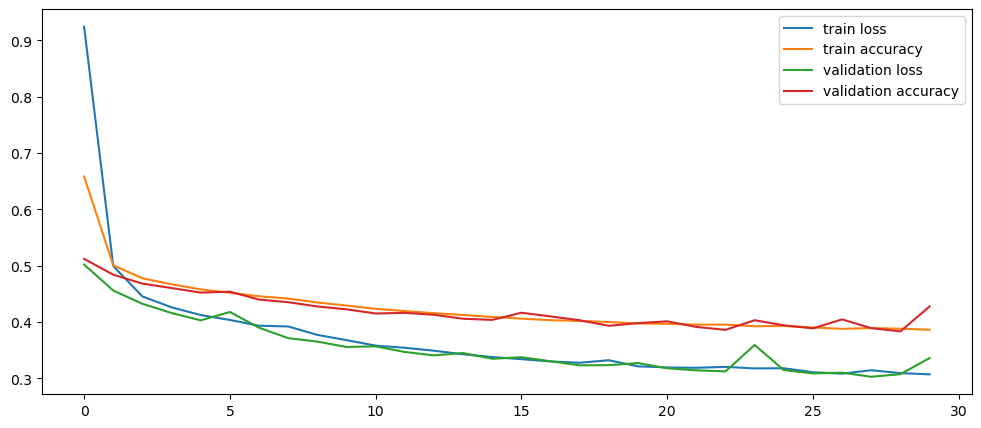

In [98]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(Rhistory.history["loss"], label="train loss")
ax.plot(Rhistory.history["mean_absolute_error"], label="train accuracy")
ax.plot(Rhistory.history["val_loss"], label="validation loss")
ax.plot(Rhistory.history["val_mean_absolute_error"], label="validation accuracy")
ax.legend()

In [99]:
model.evaluate(X_test,y_test, verbose=0)

[17138.044921875, 127.21971893310547]

# Functional API

In [100]:
X_train0.shape[1:]

(8,)

In [101]:
input_ = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

In [102]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [51]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.4545 - mean_absolute_error: 0.7048 - val_loss: 0.6388 - val_mean_absolute_error: 0.5598
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6935 - mean_absolute_error: 0.5480 - val_loss: 0.5309 - val_mean_absolute_error: 0.5374
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5576 - mean_absolute_error: 0.5313 - val_loss: 0.5089 - val_mean_absolute_error: 0.5233
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5243 - mean_absolute_error: 0.5214 - val_loss: 0.6890 - val_mean_absolute_error: 0.5665
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5596 - mean_absolute_error: 0.5189 - val_loss: 0.4822 - val_mean_absolute_error: 0.5043
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5121 - mean_absolute_error: 0.5033 - val_loss: 0.4562 - val_mean_absolute_error: 0.4862
Epoch 7/30
363/3

In [103]:
X_train_s_1, X_train_s_2 = X_train_s[:, :6], X_train_s[:, -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[:, :6], X_validation_s[:, -4:]
X_test_s_1, X_test_s_2 = X_test_s[:, :6], X_test_s[:, -4:]

In [104]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_1, input_2], outputs=[output])

In [105]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [106]:
model.fit((X_train_s_1, X_train_s_2), y_train1, epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           y_validation))

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 3.2673 - mean_absolute_error: 0.6717 - val_loss: 0.7036 - val_mean_absolute_error: 0.6147
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 20.2940 - mean_absolute_error: 0.6644 - val_loss: 0.5466 - val_mean_absolute_error: 0.5319
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 10.4441 - mean_absolute_error: 0.5791 - val_loss: 0.4690 - val_mean_absolute_error: 0.4925
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4420 - mean_absolute_error: 0.4789 - val_loss: 0.4281 - val_mean_absolute_error: 0.4691
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4173 - mean_absolute_error: 0.4661 - val_loss: 0.5257 - val_mean_absolute_error: 0.4906
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4507 - mean_absolute_error: 0.4644 - val_loss: 0.3969 - val_mean_absolute_error: 0.4622
Epoch 7/30
363

In [108]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1, name="output")(concatenate_layer)
helper_output = keras.layers.Dense(1, name="helper_output")(hidden_layer2)
model_f = keras.Model(inputs=[input_1, input_2],
                    outputs=[output, helper_output])

In [109]:
model_f.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [112]:
history_f=model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Epoch 1/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3591 - output_loss: 0.3457 - helper_output_loss: 0.4126 - output_mean_absolute_error: 0.4208 - helper_output_mean_absolute_error: 0.4643 - val_loss: 0.3624 - val_output_loss: 0.3485 - val_helper_output_loss: 0.4179 - val_output_mean_absolute_error: 0.4208 - val_helper_output_mean_absolute_error: 0.4701
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3602 - output_loss: 0.3474 - helper_output_loss: 0.4115 - output_mean_absolute_error: 0.4217 - helper_output_mean_absolute_error: 0.4638 - val_loss: 0.3506 - val_output_loss: 0.3365 - val_helper_output_loss: 0.4071 - val_output_mean_absolute_error: 0.4178 - val_helper_output_mean_absolute_error: 0.4683
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3572 - output_loss: 0.3438 - helper_output_loss: 0.4107 - output_mean_absolute_error: 0.4206 - helper_output_mean_absolute_error: 0.4621 - val_loss: 0.3571 - val_ou

363/363 [==============================] - 2s 5ms/step - loss: 0.3555 - output_loss: 0.3431 - helper_output_loss: 0.4054 - output_mean_absolute_error: 0.4177 - helper_output_mean_absolute_error: 0.4597 - val_loss: 0.3660 - val_output_loss: 0.3516 - val_helper_output_loss: 0.4237 - val_output_mean_absolute_error: 0.4264 - val_helper_output_mean_absolute_error: 0.4772
Epoch 23/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3519 - output_loss: 0.3387 - helper_output_loss: 0.4048 - output_mean_absolute_error: 0.4176 - helper_output_mean_absolute_error: 0.4601 - val_loss: 0.3559 - val_output_loss: 0.3420 - val_helper_output_loss: 0.4114 - val_output_mean_absolute_error: 0.4179 - val_helper_output_mean_absolute_error: 0.4665
Epoch 24/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3545 - output_loss: 0.3415 - helper_output_loss: 0.4063 - output_mean_absolute_error: 0.4170 - helper_output_mean_absolute_error: 0.4599 - val_loss: 0.3570 - val_output_loss

In [113]:
history_f.history

{'loss': [0.35907047986984253,
  0.3602185845375061,
  0.35722440481185913,
  0.357989639043808,
  0.3587065041065216,
  0.35698357224464417,
  0.3595219552516937,
  0.35539859533309937,
  0.35973575711250305,
  0.36004164814949036,
  0.35571250319480896,
  0.35660669207572937,
  0.3544115126132965,
  0.3577428162097931,
  0.35456544160842896,
  0.3540111482143402,
  0.37170886993408203,
  0.35342490673065186,
  0.35649141669273376,
  0.36957499384880066,
  0.35610830783843994,
  0.35553860664367676,
  0.3519073724746704,
  0.3544912338256836,
  0.35444176197052,
  0.3526332676410675,
  0.35203781723976135,
  0.3512665331363678,
  0.3511820137500763,
  0.3535516560077667],
 'output_loss': [0.3456780016422272,
  0.34739840030670166,
  0.34384503960609436,
  0.3449057638645172,
  0.34548085927963257,
  0.3437941074371338,
  0.3469915986061096,
  0.34197571873664856,
  0.34753474593162537,
  0.34753113985061646,
  0.342311292886734,
  0.34375861287117004,
  0.3410044312477112,
  0.3452419

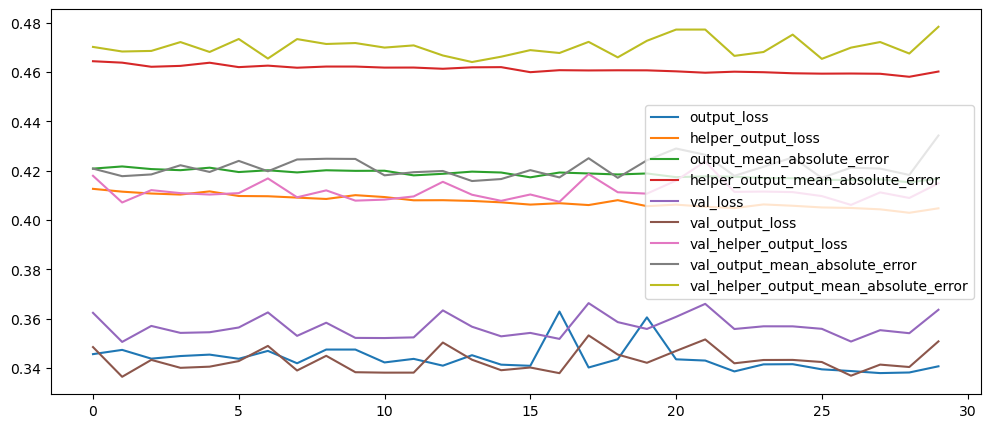

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_f.history["output_loss"], label="output_loss")
ax.plot(history_f.history["helper_output_loss"], label="helper_output_loss")
ax.plot(history_f.history["output_mean_absolute_error"], label="output_mean_absolute_error")
ax.plot(history_f.history["helper_output_mean_absolute_error"], label="helper_output_mean_absolute_error")
ax.plot(history_f.history["val_loss"], label="val_loss")
ax.plot(history_f.history["val_output_loss"], label="val_output_loss")
ax.plot(history_f.history["val_helper_output_loss"], label="val_helper_output_loss")

ax.plot(history_f.history["val_output_mean_absolute_error"], label="val_output_mean_absolute_error")

ax.plot(history_f.history["val_helper_output_mean_absolute_error"], label="val_helper_output_mean_absolute_error")

ax.legend()

# Subclass API

In [116]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer_1 = keras.layers.Dense(50, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(10, activation=activation)
        self.final_output   = keras.layers.Dense(1)
        self.helper_output  = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_1, input_2 = inputs
        h1_out = self.hidden_layer_1(input_1)
        h2_out = self.hidden_layer_2(h1_out)
        concat_out = keras.layers.concatenate([input_2, h2_out])
        final_out = self.final_output(concat_out)
        helper_out = self.helper_output(h2_out)
        return final_out, helper_out

In [117]:
model_sub = WideAndDeepANN()

In [118]:
model_sub.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [119]:
model_sub.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 1.2111 - output_1_loss: 1.1934 - output_2_loss: 1.2822 - output_1_mean_absolute_error: 0.6716 - output_2_mean_absolute_error: 0.7706 - val_loss: 0.5747 - val_output_1_loss: 0.5474 - val_output_2_loss: 0.6842 - val_output_1_mean_absolute_error: 0.5558 - val_output_2_mean_absolute_error: 0.6003
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5471 - output_1_loss: 0.5293 - output_2_loss: 0.6182 - output_1_mean_absolute_error: 0.5270 - output_2_mean_absolute_error: 0.5758 - val_loss: 0.5120 - val_output_1_loss: 0.4909 - val_output_2_loss: 0.5963 - val_output_1_mean_absolute_error: 0.5210 - val_output_2_mean_absolute_error: 0.5728
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4897 - output_1_loss: 0.4706 - output_2_loss: 0.5660 - output_1_mean_absolute_error: 0.5008 - output_2_mean_absolute_error: 0.5518 - val_loss: 0.4931 - val_output_1_loss: 0.4675 - val_outp

363/363 [==============================] - 2s 4ms/step - loss: 0.3822 - output_1_loss: 0.3690 - output_2_loss: 0.4349 - output_1_mean_absolute_error: 0.4363 - output_2_mean_absolute_error: 0.4825 - val_loss: 0.3718 - val_output_1_loss: 0.3568 - val_output_2_loss: 0.4319 - val_output_1_mean_absolute_error: 0.4337 - val_output_2_mean_absolute_error: 0.4874
Epoch 24/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3784 - output_1_loss: 0.3649 - output_2_loss: 0.4327 - output_1_mean_absolute_error: 0.4352 - output_2_mean_absolute_error: 0.4816 - val_loss: 0.3681 - val_output_1_loss: 0.3538 - val_output_2_loss: 0.4253 - val_output_1_mean_absolute_error: 0.4304 - val_output_2_mean_absolute_error: 0.4823
Epoch 25/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3770 - output_1_loss: 0.3634 - output_2_loss: 0.4313 - output_1_mean_absolute_error: 0.4334 - output_2_mean_absolute_error: 0.4809 - val_loss: 0.3717 - val_output_1_loss: 0.3574 - val_output_2_loss

In [120]:
model_f.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 6)]                  0         []                            
                                                                                                  
 dense_35 (Dense)            (None, 50)                   350       ['input_10[0][0]']            
                                                                                                  
 input_11 (InputLayer)       [(None, 4)]                  0         []                            
                                                                                                  
 dense_36 (Dense)            (None, 10)                   510       ['dense_35[0][0]']            
                                                                                            

In [122]:
model_f.save("housing_reg_model_f.h5")

In [123]:
model_f_reg = keras.models.load_model("housing_reg_model_f.h5")

In [124]:
model_f_reg.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 6)]                  0         []                            
                                                                                                  
 dense_35 (Dense)            (None, 50)                   350       ['input_10[0][0]']            
                                                                                                  
 input_11 (InputLayer)       [(None, 4)]                  0         []                            
                                                                                                  
 dense_36 (Dense)            (None, 10)                   510       ['dense_35[0][0]']            
                                                                                            

In [125]:
model_sub.summary()

Model: "wide_and_deep_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            multiple                  350       
                                                                 
 dense_38 (Dense)            multiple                  510       
                                                                 
 dense_39 (Dense)            multiple                  15        
                                                                 
 dense_40 (Dense)            multiple                  11        
                                                                 
Total params: 886 (3.46 KB)
Trainable params: 886 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
# we can not save the subclass we can save the wieghts
model_sub.save("housing_reg_model_sub.h5")
#.save_weight()

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

# Callback

In [13]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg_housing.h5",
                                                         save_best_only=True)
earlystopping_callback = keras.callbacks.EarlyStopping(patience=5,
                             restore_best_weights=True)

In [22]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[model_checkpoint_callback, earlystopping_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3737 - output_loss: 0.3601 - helper_output_loss: 0.4279 - output_mean_absolute_error: 0.4271 - helper_output_mean_absolute_error: 0.4773 - val_loss: 0.5419 - val_output_loss: 0.5688 - val_helper_output_loss: 0.4343 - val_output_mean_absolute_error: 0.4314 - val_helper_output_mean_absolute_error: 0.4714
Epoch 2/5
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5013 - output_loss: 0.5196 - helper_output_loss: 0.4278 - output_mean_absolute_error: 0.4326 - helper_output_mean_absolute_error: 0.4776 - val_loss: 0.5023 - val_output_loss: 0.5214 - val_helper_output_loss: 0.4258 - val_output_mean_absolute_error: 0.4257 - val_helper_output_mean_absolute_error: 0.4720
Epoch 3/5
11610/11610 [==============================] - 1s 60us/sample - loss: 0.6026 - output_loss: 0.6464 - helper_output_loss: 0.4268 - output_mean_absolute_error: 0.4341 - he

In [39]:
class MyCallback(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print("")
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [40]:
mycb = MyCallback()

In [41]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [25]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[tb_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
 5056/11610 [============>.................] - ETA: 0s - loss: 0.3695 - output_loss: 0.3553 - helper_output_loss: 0.4262 - output_mean_absolute_error: 0.4270 - helper_output_mean_absolute_error: 0.4764

2021-12-07 06:55:25.766564: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


11610/11610 [==============================] - 1s 53us/sample - loss: 0.3706 - output_loss: 0.3571 - helper_output_loss: 0.4245 - output_mean_absolute_error: 0.4251 - helper_output_mean_absolute_error: 0.4751 - val_loss: 0.3793 - val_output_loss: 0.3668 - val_helper_output_loss: 0.4293 - val_output_mean_absolute_error: 0.4233 - val_helper_output_mean_absolute_error: 0.4743
Epoch 2/5
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3789 - output_loss: 0.3676 - helper_output_loss: 0.4241 - output_mean_absolute_error: 0.4247 - helper_output_mean_absolute_error: 0.4744 - val_loss: 0.3784 - val_output_loss: 0.3661 - val_helper_output_loss: 0.4279 - val_output_mean_absolute_error: 0.4235 - val_helper_output_mean_absolute_error: 0.4732
Epoch 3/5
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3654 - output_loss: 0.3508 - helper_output_loss: 0.4235 - output_mean_absolute_error: 0.4232 - helper_output_mean_absolute_error: 0.4742 - val_loss: 0.3703 

In [26]:
%load_ext tensorboard

In [27]:
%tensorboard --logdir=./tb_log 

# Hyperparameter optimization

In [46]:
def ann_model(number_of_hidden_layers=1,
              number_of_neurons=50,
              lr=0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="selu"))
    model.add(keras.layers.Dense(1))
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(loss="mse", optimizer=sgd)
    return model

In [47]:
keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)

In [48]:
param_grid = {"number_of_hidden_layers":[1, 3, 5],
              "number_of_neurons":[50, 100, 150],
              "lr":[0.001, 0.001, 0.1]}

In [53]:
keras_sk_reg_gs = GridSearchCV(keras_sk_reg, param_grid)

In [ ]:
keras_sk_reg_gs.fit(X_train_s, y_train1, epochs=10,
                    validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])